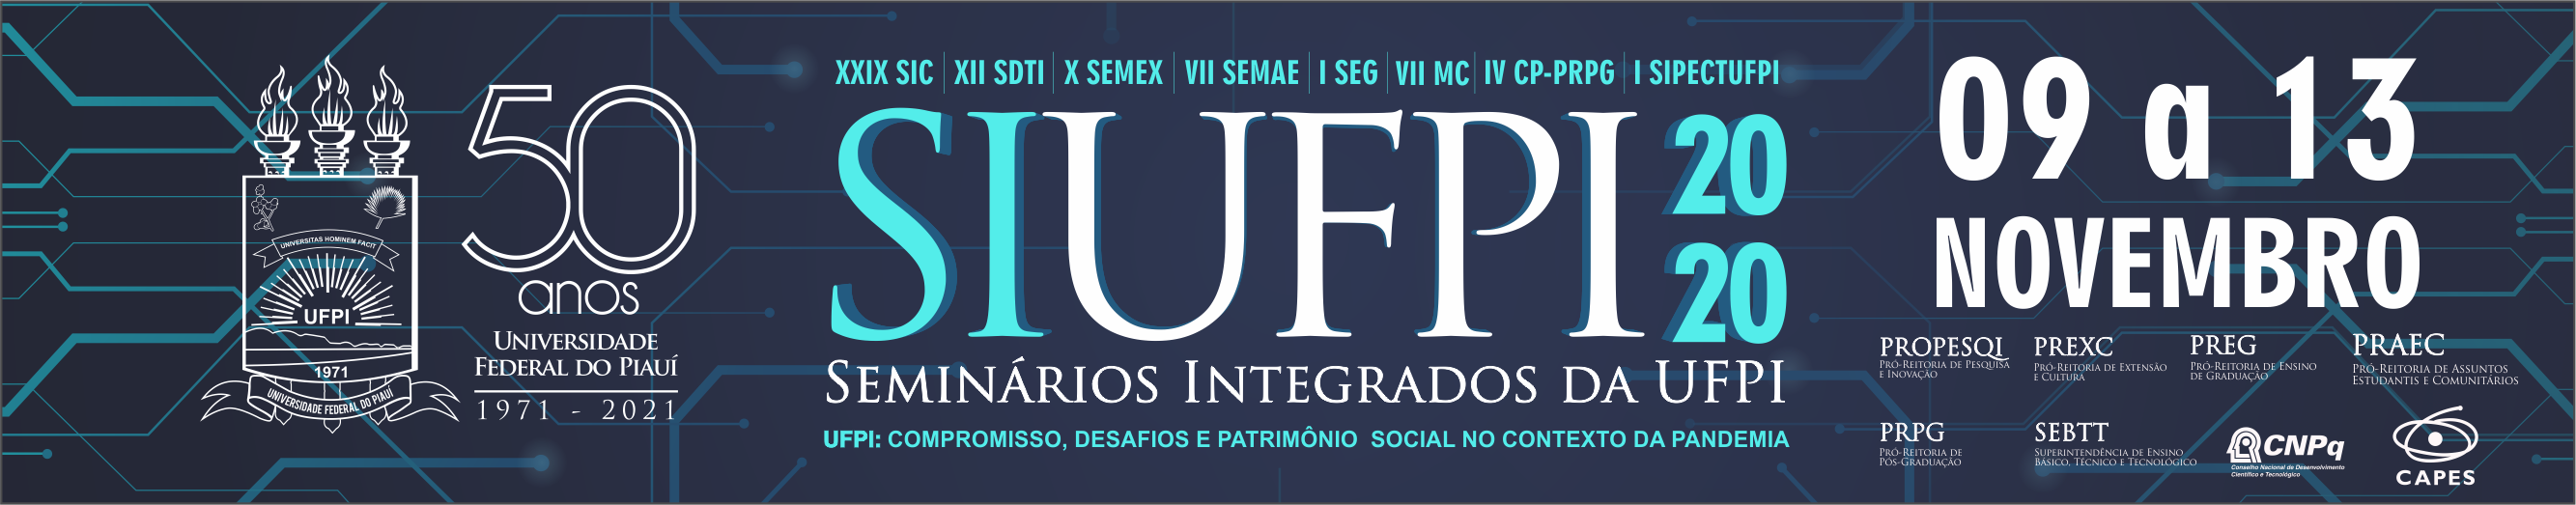

# Análise de dados de COVID-19 no estado do Piauí

Nonato R. de S. Carvalho  
Rafael Luz Araújo   
Thiago J. B. lima  
   
 Picos – PI, Novembro de 2020

# Primeiro Contato com os Dados

Quais dados podemos utilizar para realizar analises?    
Para este minicurso utilizamos dados públicos disponibilizado pelo Ministério da Saúde Brasileiro que podem ser encontrados em: https://covid.saude.gov.br/

Download dos dados 

In [ ]:
# !wget https://mobileapps.saude.gov.br/esus-vepi/files/unAFkcaNDeXajurGB7LChj8SgQYS2ptm/1cae1779810818d3e6f070ae823f4840_HIST_PAINEL_COVIDBR_04nov2020.csv

Extrair arquivo

In [ ]:
# !unzip HIST_PAINEL_COVIDBR_04nov2020.csv

## Importações das bibliotecas que iremos utilizar

In [1]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Importações para aprendizado de máquina
# from sklearn.model_selection import train_test_split

# from sklearn.linear_model import Ridge
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import make_pipeline

# from sklearn.metrics import mean_squared_error,\
#                             r2_score,\
#                             explained_variance_score
# import warnings
# warnings.filterwarnings("ignore")

## Leitura dos dados

In [2]:
!ls

covid-minicurso-aulapandas.ipynb  HIST_PAINEL_COVIDBR_04nov2020.csv
covid-minicurso.ipynb		  HIST_PAINEL_COVIDBR_04nov2020.zip


In [2]:
# dados_covid = pd.read_csv('sample_data/HIST_PAINEL_COVIDBR_02nov2020.csv', delimiter=',')
# dados_covid = pd.read_csv('sample_data/HIST_PAINEL_COVIDBR_02\nov2020.csv', error_bad_lines=False, delimiter=';')
dados_covid = pd.read_csv('HIST_PAINEL_COVIDBR_04nov2020.csv', delimiter=';')

In [4]:
dados_covid

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2,1,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253900,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-10-31,44,3015268.0,213245,483,3683,7,NaN,NaN,1.0
1253901,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-11-01,45,3015268.0,213456,211,3688,5,NaN,NaN,1.0
1253902,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-11-02,45,3015268.0,213636,180,3695,7,NaN,NaN,1.0
1253903,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-11-03,45,3015268.0,214202,566,3707,12,NaN,NaN,1.0


In [5]:
dados_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253905 entries, 0 to 1253904
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   regiao                  1253905 non-null  object 
 1   estado                  1253651 non-null  object 
 2   municipio               1242110 non-null  object 
 3   coduf                   1253905 non-null  int64  
 4   codmun                  1246793 non-null  float64
 5   codRegiaoSaude          1242110 non-null  float64
 6   nomeRegiaoSaude         1242110 non-null  object 
 7   data                    1253905 non-null  object 
 8   semanaEpi               1253905 non-null  int64  
 9   populacaoTCU2019        1249222 non-null  float64
 10  casosAcumulado          1253905 non-null  int64  
 11  casosNovos              1253905 non-null  int64  
 12  obitosAcumulado         1253905 non-null  int64  
 13  obitosNovos             1253905 non-null  int64  
 14  Re

Como ver apenas o Shape do nosso DataFrame?

In [6]:
# linhas e colunas do DataFrame
dados_covid.shape

(1253905, 17)

## Head e Tail  
O comando inverso ao head() é o tail(), que irá mostrar as 5 últimas linhas do DataFrame por padrão:

In [7]:
dados_covid.head(2)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,NaN,NaN,NaN


In [8]:
dados_covid.tail(7)

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
1253898,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-10-29,44,3015268.0,212140,698,3670,9,NaN,NaN,1.0
1253899,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-10-30,44,3015268.0,212762,622,3676,6,NaN,NaN,1.0
1253900,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-10-31,44,3015268.0,213245,483,3683,7,NaN,NaN,1.0
1253901,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-11-01,45,3015268.0,213456,211,3688,5,NaN,NaN,1.0
1253902,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-11-02,45,3015268.0,213636,180,3695,7,NaN,NaN,1.0
1253903,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-11-03,45,3015268.0,214202,566,3707,12,NaN,NaN,1.0
1253904,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-11-04,45,3015268.0,214655,453,3719,12,NaN,NaN,1.0


## Melhorando a visualização da tabela      
Um truque para visualizar melhor os dados é invertendo as linhas pelas colunas (matriz transposta), para isso basta colocar um .T depois do nosso comando que gera uma visualização de DataFrame.

In [9]:
dados_covid.T

,0,1,2,3,4,5,6,7,8,9,...,1253895,1253896,1253897,1253898,1253899,1253900,1253901,1253902,1253903,1253904
regiao,Brasil,Brasil,Brasil,Brasil,Brasil,Brasil,Brasil,Brasil,Brasil,Brasil,...,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Centro-Oeste
estado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,DF,DF,DF,DF,DF,DF,DF,DF,DF,DF
municipio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Brasília,Brasília,Brasília,Brasília,Brasília,Brasília,Brasília,Brasília,Brasília,Brasília
coduf,76,76,76,76,76,76,76,76,76,76,...,53,53,53,53,53,53,53,53,53,53
codmun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,530010.0,530010.0,530010.0,530010.0,530010.0,530010.0,530010.0,530010.0,530010.0,530010.0
codRegiaoSaude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,53001.0,53001.0,53001.0,53001.0,53001.0,53001.0,53001.0,53001.0,53001.0,53001.0
nomeRegiaoSaude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,DISTRITO FEDERAL,DISTRITO FEDERAL,DISTRITO FEDERAL,DISTRITO FEDERAL,DISTRITO FEDERAL,DISTRITO FEDERAL,DISTRITO FEDERAL,DISTRITO FEDERAL,DISTRITO FEDERAL,DISTRITO FEDERAL
data,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,...,2020-10-26,2020-10-27,2020-10-28,2020-10-29,2020-10-30,2020-10-31,2020-11-01,2020-11-02,2020-11-03,2020-11-04
semanaEpi,9,9,9,9,9,10,10,10,10,10,...,44,44,44,44,44,44,45,45,45,45
populacaoTCU2019,210147125.0,210147125.0,210147125.0,210147125.0,210147125.0,210147125.0,210147125.0,210147125.0,210147125.0,210147125.0,...,3015268.0,3015268.0,3015268.0,3015268.0,3015268.0,3015268.0,3015268.0,3015268.0,3015268.0,3015268.0


## Encadeamento de funcionalidades
Podemos juntar diversos comando na mesma linha, isto é, logo após o sample(5), pode usar o .T, e essas funcionalidades irão funcionar em cascata e de forma sequêncial, primeiro o sample(5), e depois o .T

In [10]:
dados_covid.sample(5).T

,739539,291561,762052,1085137,215659
regiao,Sudeste,Nordeste,Sudeste,Sul,Nordeste
estado,SP,PB,SP,RS,CE
municipio,Adolfo,Bayeux,Caiuá,Iraí,Cariús
coduf,35,25,35,43,23
codmun,350020.0,250180.0,350910.0,431050.0,230330.0
codRegiaoSaude,35156.0,25001.0,35114.0,43015.0,23018.0
nomeRegiaoSaude,JOSE BONIFACIO,1ª REGIAO MATA ATLANTICA,EXTREMO OESTE PAULISTA,REGIAO 15,18ª REGIAO IGUATU
data,2020-06-30,2020-07-29,2020-06-20,2020-05-09,2020-05-08
semanaEpi,27,31,25,19,19
populacaoTCU2019,3562.0,96880.0,5874.0,7241.0,18699.0


## Selecionando Linhas no pandas 

In [11]:
dados_covid[300:307].T

,300,301,302,303,304,305,306
regiao,Norte,Norte,Norte,Norte,Norte,Norte,Norte
estado,RO,RO,RO,RO,RO,RO,RO
municipio,NaN,NaN,NaN,NaN,NaN,NaN,NaN
coduf,11,11,11,11,11,11,11
codmun,NaN,NaN,NaN,NaN,NaN,NaN,NaN
codRegiaoSaude,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nomeRegiaoSaude,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17
semanaEpi,15,16,16,16,16,16,16
populacaoTCU2019,1777225.0,1777225.0,1777225.0,1777225.0,1777225.0,1777225.0,1777225.0


## Selecionando colunas     
Para selecionarmos colunas no pandas, basta dizermos o nome do DataFrame seguido por colchetes com o nome da coluna dentro:        

**Nome do Dataframe:** dados_covid    

**Colchetes com a coluna dentro:** ['casosNovos']    

**Comando completo:** dados_covid['casosNovos']    

In [12]:
dados_covid[['casosNovos']]

,casosNovos
0,0
1,1
2,0
3,0
4,1
...,...
1253900,483
1253901,211
1253902,180
1253903,566


## Selecionando Múltiplas Colunas

In [13]:
dados_covid[['casosNovos','data','regiao']][400:430].T

,400,401,402,403,404,405,406,407,408,409,...,420,421,422,423,424,425,426,427,428,429
casosNovos,684,841,2293,1145,793,700,237,338,701,785,...,144,362,1096,593,615,612,364,185,395,691
data,2020-07-20,2020-07-21,2020-07-22,2020-07-23,2020-07-24,2020-07-25,2020-07-26,2020-07-27,2020-07-28,2020-07-29,...,2020-08-09,2020-08-10,2020-08-11,2020-08-12,2020-08-13,2020-08-14,2020-08-15,2020-08-16,2020-08-17,2020-08-18
regiao,Norte,Norte,Norte,Norte,Norte,Norte,Norte,Norte,Norte,Norte,...,Norte,Norte,Norte,Norte,Norte,Norte,Norte,Norte,Norte,Norte


## Tipo de Dados do Pandas

In [14]:
type(dados_covid['regiao'])

pandas.core.series.Series

Quando selecionamos uma coluna, o nosso resultado é um objeto do tipo Series, que é basicamente a forma do pandas representar uma coluna. Uma Series é composta pelos seguintes elementos:

1. Index
2. Series Name
3. Lenght
4. dtype
5. ...

# Começando a analisar os dados

In [15]:
dados_covid

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0,0,0,0,NaN,NaN,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1,1,0,0,NaN,NaN,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1,0,0,0,NaN,NaN,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1,0,0,0,NaN,NaN,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2,1,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253900,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-10-31,44,3015268.0,213245,483,3683,7,NaN,NaN,1.0
1253901,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-11-01,45,3015268.0,213456,211,3688,5,NaN,NaN,1.0
1253902,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-11-02,45,3015268.0,213636,180,3695,7,NaN,NaN,1.0
1253903,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-11-03,45,3015268.0,214202,566,3707,12,NaN,NaN,1.0


Os dados se referêm a qual periodo de tempo?

In [16]:
print(min(dados_covid['data']))
print(max(dados_covid['data']))

2020-02-25
2020-11-04


Temos funções para minimo, máximo, média, soma, etc...

In [20]:
print((dados_covid['obitosAcumulado']).mean())

40.73371507410849


## Fazendo Operações de Agregamento

**Quantidade de registros por região**

In [12]:
dados_covid['regiao'].value_counts()

regiao
Nordeste        404355
Sudeste         373872
Sul             267024
Centro-Oeste    105603
Norte           102797
Brasil             254
Name: count, dtype: int64

**Quantidade de registros por estado**

In [8]:
dados_covid['estado'].value_counts()

estado
MG    190696
SP    144312
RS    111308
BA     93468
PR     89454
SC     66262
GO     55335
PI     50429
PB     50206
MA     48868
PE     41732
CE     41509
RN     37718
PA     32366
MT     31920
TO     31474
AL     23223
RJ     20993
MS     17871
ES     17871
SE     17202
AM     14080
RO     12073
AC      5160
AP      3822
RR      3822
DF       477
Name: count, dtype: int64

## Total de casos de COVID-19 no Brasil

In [31]:
# Filtrar a região por "Brasil"
dados_covid_brasil = dados_covid[dados_covid['regiao'] == 'Brasil']

In [32]:
# Total de casos acumulados no Brasil
dados_covid_brasil['casosAcumulado'].max()

5590025

In [33]:
# Total de óbitos acumulados no Brasil
dados_covid_brasil['obitosAcumulado'].max()

161106

## Quantidade de Casos e Obitos acumulados por Região

In [49]:
# Agrupa os dados por região e por estado. # Filtra o maior valor de casosAcumulado e obitosAcumulado.
regiao = pd.DataFrame(dados_covid.groupby(['regiao','estado'])[['casosAcumulado','obitosAcumulado']].max())

In [44]:
regiao

casosAcumulado  obitosAcumulado
regiao       estado                                 
Centro-Oeste DF              214655             3719
             GO              258241             5797
             MS               83439             1622
             MT              144258             3828
Nordeste     AL               91142             2254
             BA              355753             7711
             CE              275671             9370
             MA              186572             4091
             PB              133958             3130
             PE              163642             8667
             PI              114530             2441
             RN               81876             2588
             SE               84709             2228
Norte        AC               31218              696
             AM              163399             4588
             AP               52832              751
             PA              254384             6767
             RO               72295             1464
             RR               57789              693
             TO               75991             1105
Sudeste      ES              158768             3884
             MG              362340             9069
             RJ              313089            20759
             SP             1123299            39549
Sul          PR              216266             5269
             RS              253272             5903
             SC              266637             3163

In [50]:
# Agrupa novamente as regiões e realiza o somatorio de cada região
regiao.groupby('regiao').sum()

,casosAcumulado,obitosAcumulado
regiao,,
Centro-Oeste,700593,14966
Nordeste,1487853,42480
Norte,707908,16064
Sudeste,1957496,73261
Sul,736175,14335


### E se quisessemos apenas o total de casos da região Nordeste?

In [54]:
# Filtrando dados apenas da região Nordeste
dados_covid_nordeste = dados_covid[dados_covid['regiao'] == 'Nordeste']

# Agrupando os dados por estado e realizando o somatórios dos valores máximos 
casos_caumulados_nordeste = dados_covid_nordeste.groupby('estado')['casosAcumulado'].max().sum()

print("Nº de casos acumulados no Nordeste: ", casos_caumulados_nordeste)

Nº de casos acumulados no Nordeste:  1487853


## Casos de COVID-19 por UF de notificação

In [55]:
casos_por_uf = pd.DataFrame(dados_covid.groupby('estado')['casosAcumulado'].max())
casos_por_uf

,casosAcumulado
estado,
AC,31218
AL,91142
AM,163399
AP,52832
BA,355753
CE,275671
DF,214655
ES,158768
GO,258241


## Como filtrar apenas um estado (Piauí)

In [58]:
dados_covid_pi = dados_covid[dados_covid['estado'] == 'PI']
dados_covid_pi

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
2286,Nordeste,PI,NaN,22,NaN,NaN,NaN,2020-02-25,9,3273227.0,0,0,0,0,NaN,NaN,NaN
2287,Nordeste,PI,NaN,22,NaN,NaN,NaN,2020-02-26,9,3273227.0,0,0,0,0,NaN,NaN,NaN
2288,Nordeste,PI,NaN,22,NaN,NaN,NaN,2020-02-27,9,3273227.0,0,0,0,0,NaN,NaN,NaN
2289,Nordeste,PI,NaN,22,NaN,NaN,NaN,2020-02-28,9,3273227.0,0,0,0,0,NaN,NaN,NaN
2290,Nordeste,PI,NaN,22,NaN,NaN,NaN,2020-02-29,9,3273227.0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206915,Nordeste,PI,Wall Ferraz,22,221170.0,22009.0,VALE DO RIO GUARIBAS,2020-10-31,44,4462.0,298,0,2,0,NaN,NaN,0.0
206916,Nordeste,PI,Wall Ferraz,22,221170.0,22009.0,VALE DO RIO GUARIBAS,2020-11-01,45,4462.0,298,0,2,0,NaN,NaN,0.0
206917,Nordeste,PI,Wall Ferraz,22,221170.0,22009.0,VALE DO RIO GUARIBAS,2020-11-02,45,4462.0,298,0,2,0,NaN,NaN,0.0
206918,Nordeste,PI,Wall Ferraz,22,221170.0,22009.0,VALE DO RIO GUARIBAS,2020-11-03,45,4462.0,298,0,2,0,NaN,NaN,0.0


## Contando quantos municipios tem no estado

In [60]:
# a função nunique() traz o número de observações distintas
dados_covid_pi['municipio'].nunique()

224

## Top 5 municipios do PI que mais tiveram obitos

In [76]:
municipios_pi = dados_covid_pi.groupby("municipio")['obitosAcumulado'].max().sort_values(ascending=False).head(5).to_frame('Top 5 municipios com mais obitos no PI')
municipios_pi

,Top 5 municipios com mais obitos no PI
municipio,
Teresina,1118
Parnaíba,138
Picos,81
Barras,57
Floriano,56


## Taxa de letalidade em um municipio do PI

In [77]:
dados_covid_municipio = dados_covid_pi[dados_covid_pi['municipio']=='Picos']

In [78]:
dados_covid_municipio

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
192425,Nordeste,PI,Picos,22,220800.0,22009.0,VALE DO RIO GUARIBAS,2020-03-27,13,78222.0,0,0,0,0,NaN,NaN,0.0
192426,Nordeste,PI,Picos,22,220800.0,22009.0,VALE DO RIO GUARIBAS,2020-03-28,13,78222.0,0,0,0,0,NaN,NaN,0.0
192427,Nordeste,PI,Picos,22,220800.0,22009.0,VALE DO RIO GUARIBAS,2020-03-29,14,78222.0,0,0,0,0,NaN,NaN,0.0
192428,Nordeste,PI,Picos,22,220800.0,22009.0,VALE DO RIO GUARIBAS,2020-03-30,14,78222.0,0,0,0,0,NaN,NaN,0.0
192429,Nordeste,PI,Picos,22,220800.0,22009.0,VALE DO RIO GUARIBAS,2020-03-31,14,78222.0,0,0,0,0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192643,Nordeste,PI,Picos,22,220800.0,22009.0,VALE DO RIO GUARIBAS,2020-10-31,44,78222.0,3946,52,80,0,NaN,NaN,0.0
192644,Nordeste,PI,Picos,22,220800.0,22009.0,VALE DO RIO GUARIBAS,2020-11-01,45,78222.0,3980,34,80,0,NaN,NaN,0.0
192645,Nordeste,PI,Picos,22,220800.0,22009.0,VALE DO RIO GUARIBAS,2020-11-02,45,78222.0,3994,14,80,0,NaN,NaN,0.0
192646,Nordeste,PI,Picos,22,220800.0,22009.0,VALE DO RIO GUARIBAS,2020-11-03,45,78222.0,4016,22,80,0,NaN,NaN,0.0


In [81]:
# Demonstrando duas formas de obter o total de casos ou total de obitos
acumulados_picos = dados_covid_municipio['casosAcumulado'].max()
acumulados_picos2 = dados_covid_municipio['casosNovos'].sum()

print('Maior caso acumulado: ',acumulados_picos)
print('Somatorio dos casos novos: ', acumulados_picos2)

Maior caso acumulado:  4040
Somatorio dos casos novos:  4040


**Como calculo a taxa de letalidade?**

Taxa de letalidade = ∑óbitos / ∑casos 

In [87]:
# letalidade = max(dados_covid_municipio['obitosAcumulado']) / max(dados_covid_municipio['casosAcumulado'])

# ou pode ser também:
letalidade = sum(dados_covid_municipio['obitosNovos']) / sum(dados_covid_municipio['casosNovos'])
letalidade

0.02004950495049505

In [83]:
letalidade * 100

2.004950495049505

In [92]:
ultima_data = max(dados_covid_municipio['data'])

print("Taxa de Letalidade em Picos na data " + ultima_data + ": {0:6.3f}%".format(letalidade*100))

Taxa de Letalidade em Picos na data 2020-11-04:  2.005%


# Plotando informações de forma gráfica com Matplotlib

In [94]:
dados_covid_obitos_data = dados_covid_municipio[['data','obitosNovos']]
# Removendo os dias em que não houveram obitos
obitos = dados_covid_obitos_data[dados_covid_obitos_data['obitosNovos'] != 0]
obitos

,data,obitosNovos
192449,2020-04-20,1
192470,2020-05-11,1
192471,2020-05-12,1
192480,2020-05-21,1
192483,2020-05-24,1
...,...,...
192630,2020-10-18,1
192635,2020-10-23,1
192637,2020-10-25,1
192640,2020-10-28,1


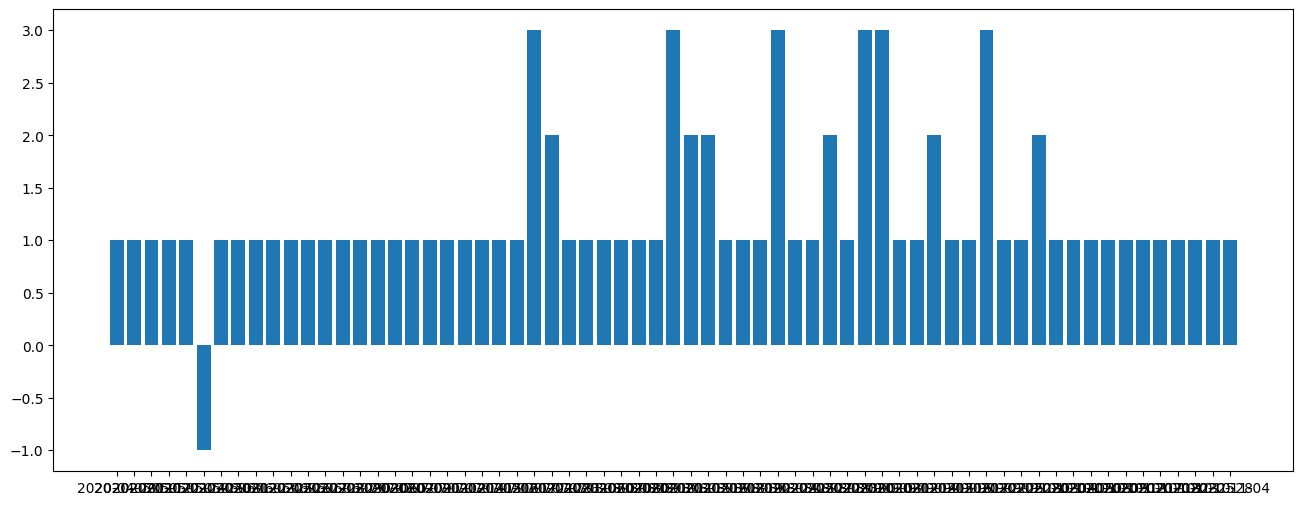

In [169]:
valores_data = obitos['data']
valores_obitos = obitos['obitosNovos']

fig, ax = plt.subplots(figsize =(16, 6))
plt.bar(valores_data, valores_obitos)
plt.show()

## Obitos Novos confirmados

In [170]:
obitos["data"] = pd.to_datetime(obitos["data"])
obitos["dia"] = obitos["data"].dt.day
obitos["mes"] = obitos["data"].dt.month
obitos["ano"] = obitos["data"].dt.year
obitos

/tmp/ipykernel_13798/2271900821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obitos["data"] = pd.to_datetime(obitos["data"])
/tmp/ipykernel_13798/2271900821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obitos["dia"] = obitos["data"].dt.day
/tmp/ipykernel_13798/2271900821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,data,obitosNovos,dia,mes,ano
192449,2020-04-20,1,20,4,2020
192470,2020-05-11,1,11,5,2020
192471,2020-05-12,1,12,5,2020
192480,2020-05-21,1,21,5,2020
192483,2020-05-24,1,24,5,2020
...,...,...,...,...,...
192630,2020-10-18,1,18,10,2020
192635,2020-10-23,1,23,10,2020
192637,2020-10-25,1,25,10,2020
192640,2020-10-28,1,28,10,2020


In [175]:
obitos_mes = pd.DataFrame(obitos.groupby('mes')['obitosNovos'].sum()) 
obitos_mes 

,obitosNovos
mes,
4,1
5,3
6,8
7,16
8,23
9,17
10,12
11,1


<Axes: xlabel='Mês', ylabel='Óbitos Novos '>

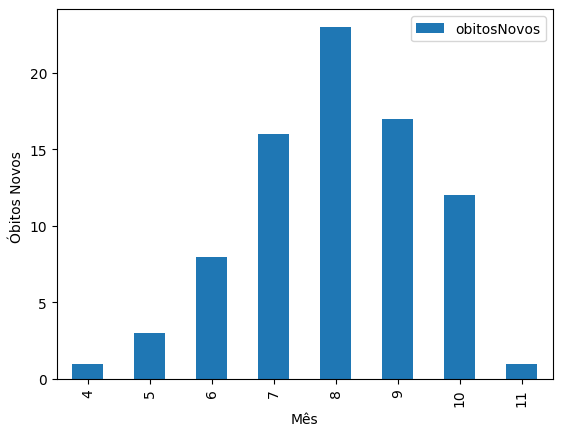

In [171]:
obitos_mes = pd.DataFrame(obitos.groupby('mes')['obitosNovos'].sum()) 
obitos_mes.plot.bar(ylabel='Óbitos Novos ', xlabel='Mês')

## Casos novos de COVID-19 por data de notificação (ultimos 5 dias)

<Axes: xlabel='Mês', ylabel='Óbitos Novos'>

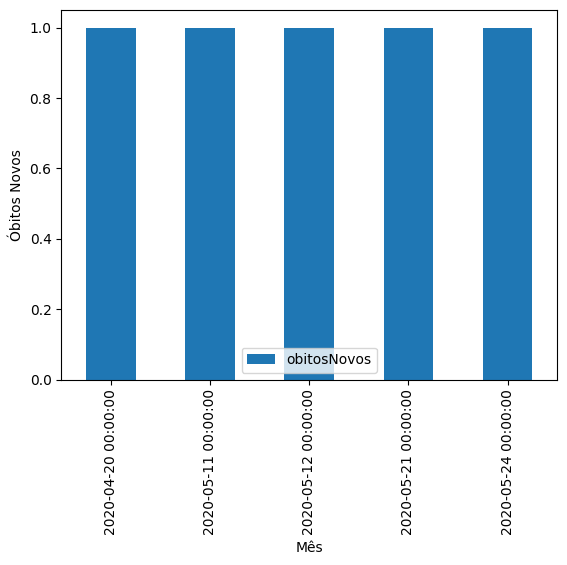

In [176]:
obitos_mes = pd.DataFrame(obitos.groupby('data')['obitosNovos'].sum()) 
obitos_mes.head(5).plot.bar(ylabel='Óbitos Novos', xlabel='Mês')

## Casos novos por municipio (Top 10)

<Axes: xlabel='municipio'>

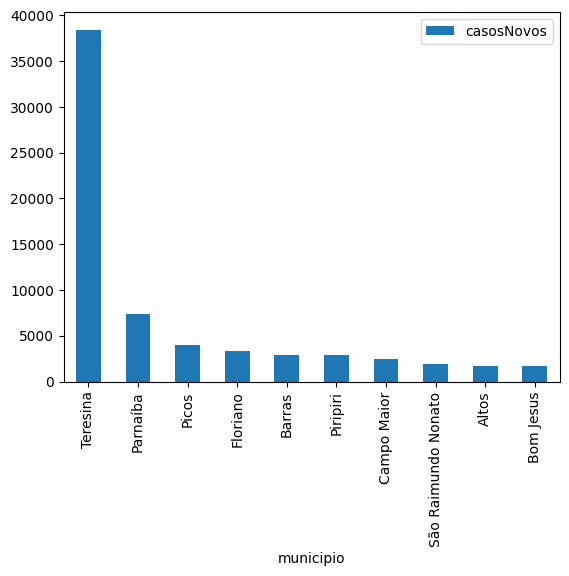

In [189]:
dados_covid_pi = dados_covid[dados_covid['estado'] == 'PI']
dados_municipios = dados_covid_pi[['municipio', 'casosNovos']]
obitos_mes = pd.DataFrame(dados_municipios.groupby('municipio')['casosNovos'].sum().sort_values(ascending=False)) 
obitos_mes.head(10).plot.bar()

## Outros exemplos de gráficos

In [191]:
dados = pd.read_csv('HIST_PAINEL_COVIDBR_04nov2020.csv', delimiter=';')

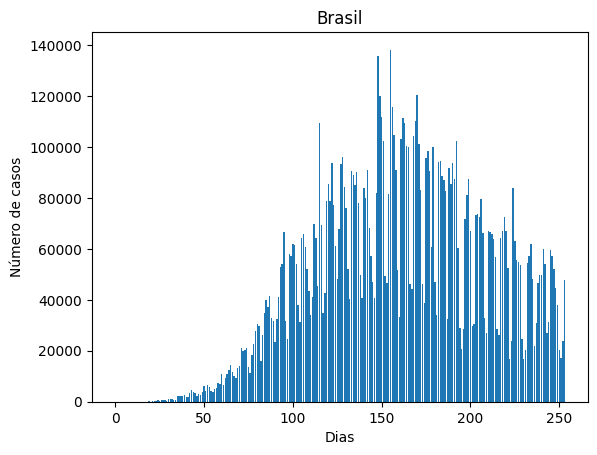

In [193]:
# Brasil 

# Filtrando estado do PI
BRFull = dados

# Excluir os NaN de munícipios e População 
BRFull = BRFull[BRFull.municipio.isna() & BRFull.populacaoTCU2019.notna()]

# Agrupando os dados por data
brasil = BRFull[['data','casosAcumulado','obitosAcumulado','casosNovos','obitosNovos']].groupby(['data']).sum()

# Adicionando o index 
brasil.index = range(len(brasil))

# Gerando gráfico 
x = brasil.index.values
fig, ax = plt.subplots()
plt.bar(x, brasil['casosNovos'].values)
plt.xlabel('Dias')
plt.ylabel('Número de casos')
plt.title('Brasil')
plt.show()

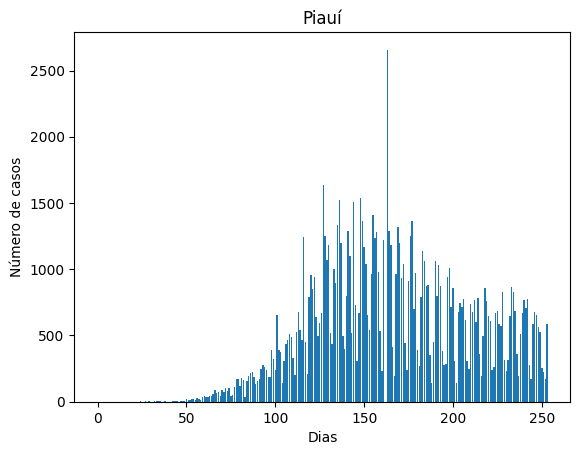

In [194]:
# Piauí

# Filtrando estado do PI
PIFull = dados[dados.estado == 'PI']

# Excluir os NaN de munícipios e População 
PIFull = PIFull[PIFull.municipio.isna() & PIFull.populacaoTCU2019.notna()]

# Agrupando os dados por data
PI = PIFull[['data','casosAcumulado','obitosAcumulado','casosNovos','obitosNovos']].groupby(['data']).sum()

# Adicionando o index 
PI.index = range(len(PI))

# Gerando gráfico 
x = PI.index.values
fig, ax = plt.subplots()
plt.bar(x, PI['casosNovos'].values)
plt.xlabel('Dias')
plt.ylabel('Número de casos')
plt.title('Piauí')
plt.show()

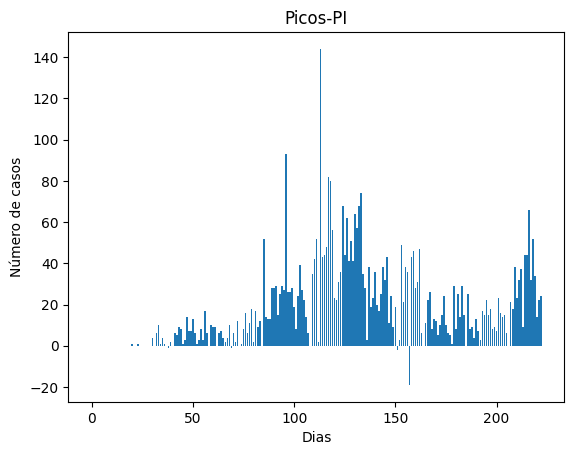

In [195]:
#Picos

# Filtrando estado do PI
Picos = dados[dados.estado == 'PI']

# Filtrando município Picos
Picos = Picos[Picos.municipio == 'Picos']

# Agrupando os dados por data
dadosPicos = Picos[['data','casosAcumulado','obitosAcumulado','casosNovos','obitosNovos']].groupby(['data']).sum()

# Adicionando o index 
dadosPicos.index = range(len(dadosPicos))

# Gerando gráfico 
x = dadosPicos.index.values
fig, ax = plt.subplots()
plt.bar(x, dadosPicos['casosNovos'].values)
plt.xlabel('Dias')
plt.ylabel('Número de casos')
plt.title('Picos-PI')
plt.show()

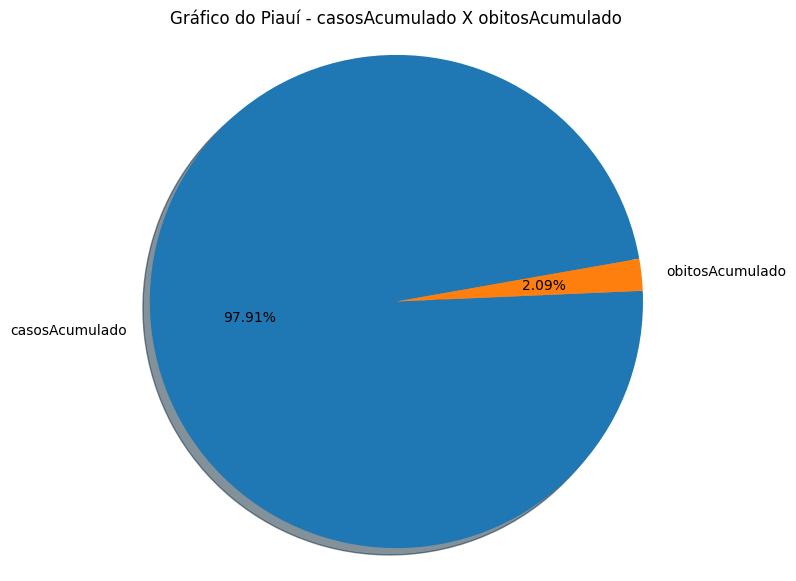

In [199]:
# Piauí

# Filtrando estado do PI
PIFull = dados[dados.estado == 'PI']

# Excluir os NaN de munícipios e População 
PIFull = PIFull[PIFull.municipio.isna() & PIFull.populacaoTCU2019.notna()]


PI = PIFull[['data','casosAcumulado','obitosAcumulado','casosNovos','obitosNovos']].groupby(['data']).sum()
pi2 = PI[['casosAcumulado', 'obitosAcumulado']].max()
pi2

import matplotlib.pyplot as plt

labels = ['casosAcumulado', 'obitosAcumulado']
sizes = pi2.values

fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, startangle=10)

ax1.axis('equal')

plt.title('Gráfico do Piauí - casosAcumulado X obitosAcumulado')

plt.show()

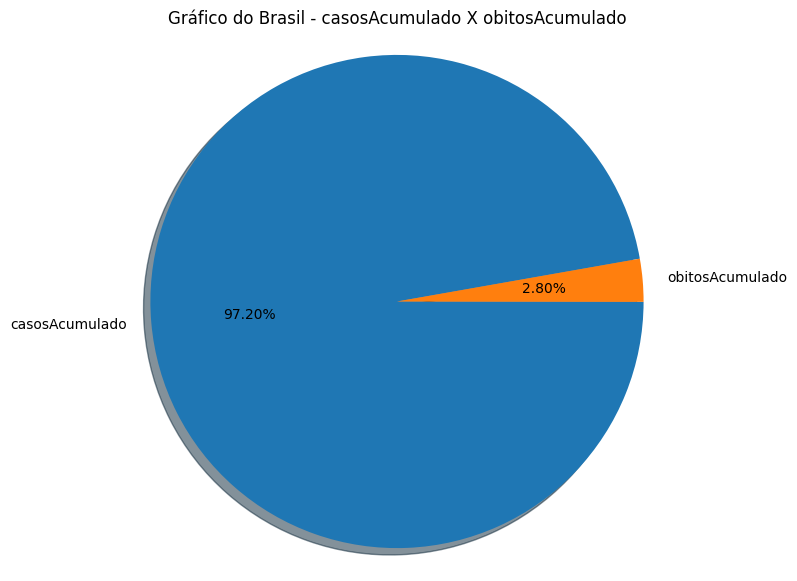

In [200]:
# Brasil

# Excluir os NaN de munícipios e População 
BRFull = dados[dados.municipio.isna() & dados.populacaoTCU2019.notna()]


BR = BRFull[['data','casosAcumulado','obitosAcumulado','casosNovos','obitosNovos']].groupby(['data']).sum()
BR = BR[['casosAcumulado', 'obitosAcumulado']].max()


import matplotlib.pyplot as plt

labels = ['casosAcumulado', 'obitosAcumulado']
sizes = BR.values

fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, startangle=10)

ax1.axis('equal')

plt.title('Gráfico do Brasil - casosAcumulado X obitosAcumulado')

plt.show()

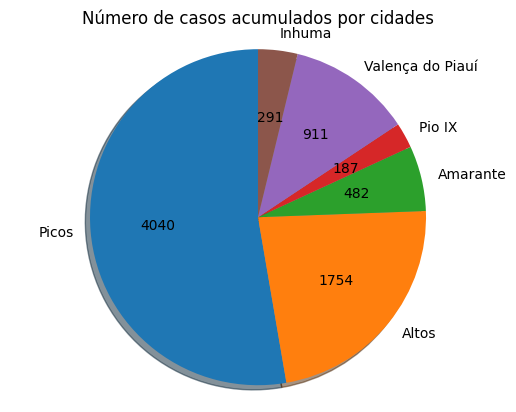

In [201]:
# Brasil

# Filtrando estado do PI
PIFull = dados[dados.estado == 'PI']

PI = PIFull[['municipio', 'casosAcumulado']].groupby(['municipio']).max()
# BR = BR[['casosAcumulado', 'obitosAcumulado']].max()

labels = ['Picos', 'Altos', 'Amarante', 'Pio IX', 'Valença do Piauí','Inhuma']
sizes = PI.T[labels].values.ravel()
total = sum(sizes)
plt.pie(sizes, labels=labels, autopct=lambda p: '{:.0f}'.format(p * total / 100), shadow=True, startangle=90)
plt.axis('equal') 
plt.title('Número de casos acumulados por cidades')
plt.show()

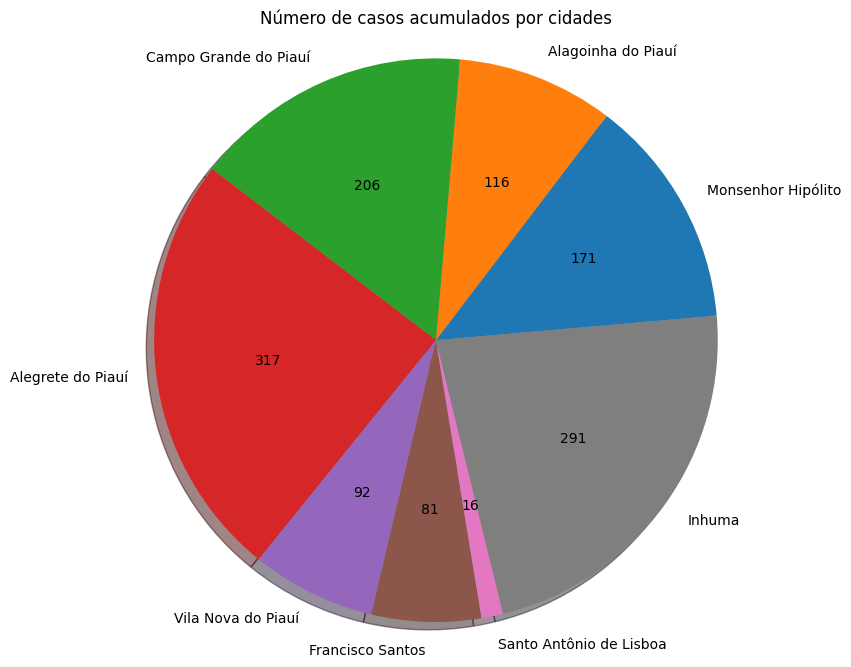

In [202]:
# Brasil

# Filtrando estado do PI
PIFull = dados[dados.estado == 'PI']

PI = PIFull[['municipio', 'casosAcumulado']].groupby(['municipio']).max()
# BR = BR[['casosAcumulado', 'obitosAcumulado']].max()

labels = ['Monsenhor Hipólito', 
          'Alagoinha do Piauí', 
          'Campo Grande do Piauí', 
          'Alegrete do Piauí',
          'Vila Nova do Piauí', 
          'Francisco Santos', 
          'Santo Antônio de Lisboa', 
          'Inhuma']
sizes = PI.T[labels].values.ravel()
total = sum(sizes)
plt.subplots(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct=lambda p: '{:.0f}'.format(p * total / 100), shadow=True, startangle=5)
plt.axis('equal') 
plt.title('Número de casos acumulados por cidades')
plt.show()